# Decision Tree Regression

In [1]:
from warnings import filterwarnings

filterwarnings("ignore")

# Step 1 - Data Ingestion 
Read the training data

In [2]:
import pandas as pd

df = pd.read_csv("PowerPlant.csv")
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


# Column Names
1. AT - Atmospheric Temperature in degree Celsius
2. V - Vacuum Pressure in Pascals
3. AP - Atomspheric Pressure in Pascals
4. RH - Relative Humidity in Percentage
5. PE - Power Output in MW
6. PE Target Feature

# Step 2 - Perform Basic Data quality checks

In [5]:
df.shape

(9568, 5)

In [3]:
df.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [4]:
df.duplicated().sum()

np.int64(41)

In [6]:
# Drop duplicates
df = df.drop_duplicates(keep="first").reset_index(drop=True)

In [7]:
df.shape

(9527, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9527 entries, 0 to 9526
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9527 non-null   float64
 1   V       9527 non-null   float64
 2   AP      9527 non-null   float64
 3   RH      9527 non-null   float64
 4   PE      9527 non-null   float64
dtypes: float64(5)
memory usage: 372.3 KB


# Step 3 - Seperate X and Y(PE)

In [9]:
X = df.drop(columns=["PE"])
Y = df[["PE"]]

In [10]:
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [11]:
Y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


<Axes: xlabel='PE', ylabel='Count'>

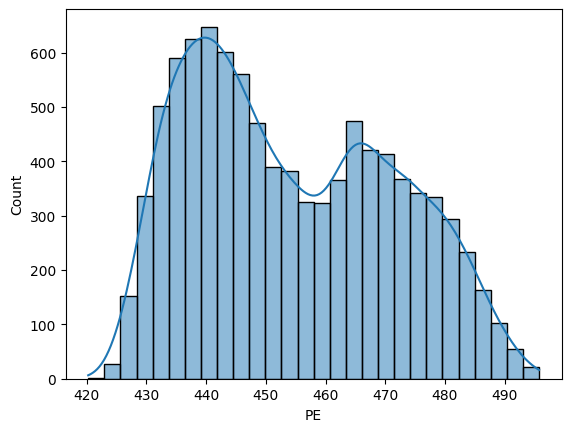

In [13]:
import seaborn as sns

sns.histplot(data=Y, x="PE", kde=True)

# Step 4 - Apply preprocessing on X

# 

In [14]:
X.dtypes

AT    float64
V     float64
AP    float64
RH    float64
dtype: object

In [15]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [ ]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"), 
    StandardScaler()
).set_output(transform="pandas")

In [17]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,AT,V,AP,RH
0,-1.520448,-1.066041,-0.403535,1.141599
1,0.534897,0.330813,-0.309262,0.059223
2,1.354348,0.205475,-1.024725,-2.151400
3,-0.079020,-0.362884,-1.012941,0.236538
4,-1.055645,-1.074713,0.655349,1.633837


# Step 5 - Apply Train Test Split

In [18]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
    X_pre, Y, test_size=0.2, random_state=42
)

In [19]:
xtrain.head()

,AT,V,AP,RH
5695,-0.152905,0.324507,0.089713,1.817999
7300,-1.497611,-1.153542,0.323712,0.908830
9066,-0.885038,-0.954892,0.293410,0.988245
6424,1.398679,1.223949,-0.479290,-1.082031
6773,-0.824586,-0.942279,0.796758,1.506499


In [20]:
ytrain.head()

,PE
5695,446.68
7300,483.54
9066,461.71
6424,437.38
6773,463.71


In [21]:
xtest.head()

,AT,V,AP,RH
1087,1.827212,1.120683,-0.125767,-1.414069
6308,-1.501641,-1.244984,0.044260,-0.467246
8021,-1.465370,-1.418408,0.399466,-1.082031
9483,0.150695,0.648495,0.731104,-0.002393
4459,-0.036032,1.128565,-0.361449,1.586599


In [22]:
ytest.head()

,PE
1087,429.38
6308,485.29
8021,480.40
9483,452.30
4459,446.47


In [24]:
xtrain.shape

(7621, 4)

In [25]:
xtest.shape

(1906, 4)

# Step 6 - Build the model

In [28]:
from sklearn.tree import DecisionTreeRegressor

model1 = DecisionTreeRegressor(
    max_depth=1,
    min_samples_split=5,
    min_samples_leaf=5,
    criterion="squared_error",
    random_state=42,
)

model1.fit(xtrain, ytrain)

DecisionTreeRegressor(max_depth=1, min_samples_leaf=5, min_samples_split=5,
                      random_state=42)

In [29]:
model1.score(xtrain, ytrain)

0.71765957297802

In [30]:
model1.score(xtest, ytest)

0.7251450398190283

# Hyperparameter tuning
1. Regression Problem use - R2 score
2. Classification Problem use - f1_macro

Techniques
1. GridsearchCV - Will test all possible combinations - Slower
2. RandomisedSearchCV - Will test random optoins for given repitions - Faster

In [31]:
params = {
    "max_depth": [5, 6, 7, 8, 9, 10, 11, 12],
    "min_samples_split": [5, 6, 7],
    "min_samples_leaf": [5, 6, 7],
    "criterion": ["squared_error", "absolute_error"],
}

In [33]:
from sklearn.model_selection import RandomizedSearchCV

dtr = DecisionTreeRegressor(random_state=42)
gscv_dtr = RandomizedSearchCV(
    estimator=dtr, param_distributions=params, cv=5, scoring="r2"
)
gscv_dtr.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': [5, 6, 7, 8, 9, 10, 11,
                                                      12],
                                        'min_samples_leaf': [5, 6, 7],
                                        'min_samples_split': [5, 6, 7]},
                   scoring='r2')

In [34]:
gscv_dtr.best_params_

{'min_samples_split': 5,
 'min_samples_leaf': 6,
 'max_depth': 11,
 'criterion': 'squared_error'}

In [35]:
gscv_dtr.best_score_

np.float64(0.9395634423013621)

In [36]:
best_dtr = gscv_dtr.best_estimator_
best_dtr

DecisionTreeRegressor(max_depth=11, min_samples_leaf=6, min_samples_split=5,
                      random_state=42)

# Step 7 - Evalutate the model

In [37]:
from sklearn.metrics import (
    root_mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score,
)

In [38]:
def evaluate_model(model, x, y):
    ypred = model.predict(x)
    rmse = root_mean_squared_error(y, ypred)
    mae = mean_absolute_error(y, ypred)
    mape = mean_absolute_percentage_error(y, ypred)
    r2 = r2_score(y, ypred)
    print(f"RMSE : {rmse:.2f}")
    print(f"MAE : {mae:.2f}")
    print(f"MAPE : {mape:.2%}")
    print(f"R2 : {r2:.2%}")

In [39]:
print("Train Evaluation : ")
evaluate_model(best_dtr, xtrain, ytrain)

Train Evaluation : 
RMSE : 3.01
MAE : 2.14
MAPE : 0.47%
R2 : 96.86%


In [40]:
print("Test Evaluation : ")
evaluate_model(best_dtr, xtest, ytest)

Test Evaluation : 
RMSE : 3.89
MAE : 2.86
MAPE : 0.63%
R2 : 94.98%


# Step 8 - Visulalize decision Tree and feature importances

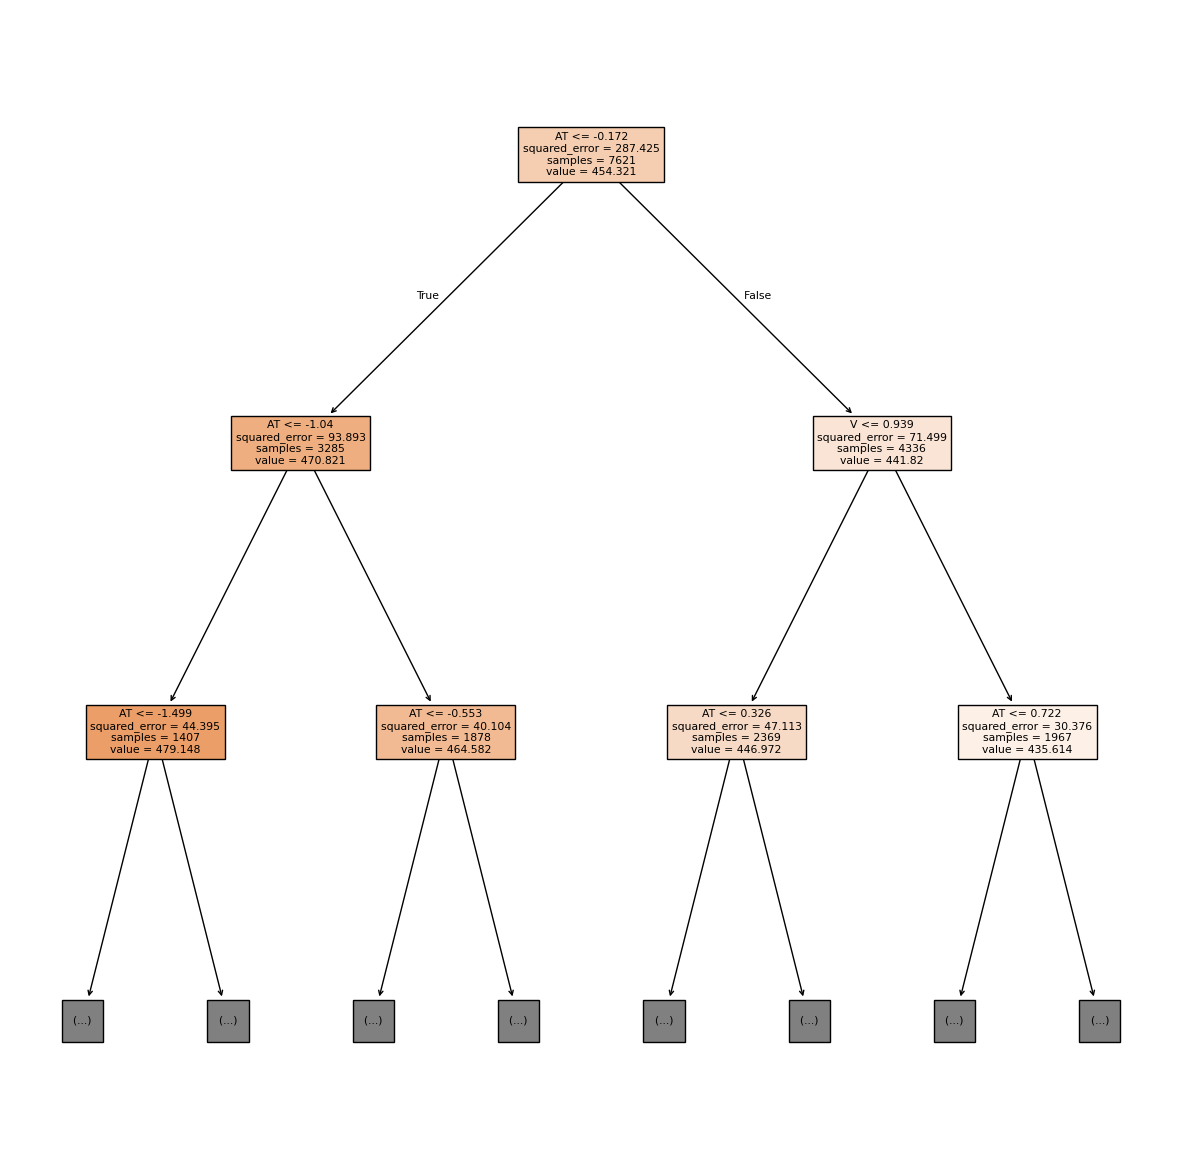

In [43]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 15))
plot_tree(best_dtr, filled=True, feature_names=xtrain.columns, max_depth=2)
plt.show()

In [44]:
best_dtr.feature_importances_

array([0.88986916, 0.08862926, 0.01243422, 0.00906736])

In [45]:
xtrain.columns

Index(['AT', 'V', 'AP', 'RH'], dtype='object')

In [46]:
imp = pd.Series(best_dtr.feature_importances_, index=xtrain.columns)
imp

AT    0.889869
V     0.088629
AP    0.012434
RH    0.009067
dtype: float64

In [47]:
imp.sort_values(ascending=False)

AT    0.889869
V     0.088629
AP    0.012434
RH    0.009067
dtype: float64

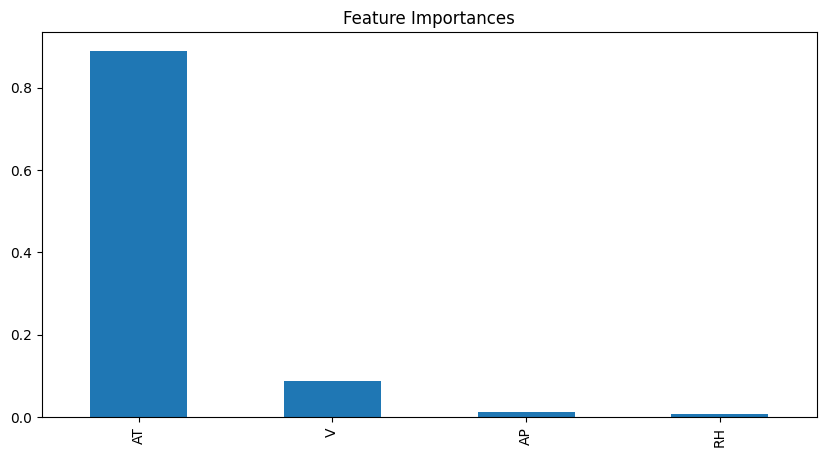

In [50]:
imp.sort_values(ascending=False).plot(
    kind="bar", figsize=(10, 5), title="Feature Importances"
)
plt.show()

# Step 9 - Out of Sample Prediction

In [51]:
xnew = pd.read_csv("test_PowerPlant.csv")
xnew

,AT,V,AP,RH
0,22.49,58.82,1009.73,85.19
1,28.88,54.89,1007.16,46.60
2,27.89,73.21,1001.32,85.88
3,25.69,62.26,1011.38,74.08
4,12.16,40.81,1025.79,70.97
...,...,...,...,...
95,26.35,69.48,1008.45,70.47
96,11.78,39.96,1011.37,82.95
97,5.62,41.38,1020.91,86.21
98,24.96,74.99,1008.25,80.52


In [52]:
xnew.shape

(100, 4)

In [53]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [54]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre.head()

,AT,V,AP,RH
0,0.380410,0.356827,-0.590397,0.811615
1,1.238819,0.047028,-1.023041,-1.830315
2,1.105826,1.491180,-2.006171,0.858853
3,0.810286,0.628000,-0.312629,0.051007
4,-1.007284,-1.062888,2.113209,-0.161908


In [55]:
preds = best_dtr.predict(xnew_pre)
preds

array([445.47083333, 438.99166667, 432.42291667, 442.40954023,
       465.58888889, 445.47083333, 449.94181818, 478.05833333,
       467.77416667, 475.75473684, 453.98294118, 472.501     ,
       447.14      , 438.6926087 , 431.23166667, 427.94      ,
       452.2245    , 462.08333333, 443.765     , 434.19948718,
       435.03      , 473.08875   , 480.745     , 433.83375   ,
       468.32166667, 442.40954023, 440.15714286, 431.44352941,
       442.215     , 442.38      , 482.62638298, 462.65727273,
       438.65363636, 444.04326087, 435.03      , 445.93875   ,
       468.07428571, 469.22226667, 435.35714286, 472.22272727,
       453.55571429, 456.47333333, 481.047     , 434.244375  ,
       453.77272727, 442.386     , 457.2875    , 452.01666667,
       453.77272727, 456.30181818, 476.67465753, 457.25894737,
       471.81547619, 461.27522727, 467.73512821, 443.57571429,
       432.2987931 , 448.40857143, 471.34756757, 474.00166667,
       448.045     , 431.484     , 456.627     , 452.01

In [56]:
xnew["PE_pred"] = preds.round(2)

In [57]:
xnew

,AT,V,AP,RH,PE_pred
0,22.49,58.82,1009.73,85.19,445.47
1,28.88,54.89,1007.16,46.60,438.99
2,27.89,73.21,1001.32,85.88,432.42
3,25.69,62.26,1011.38,74.08,442.41
4,12.16,40.81,1025.79,70.97,465.59
...,...,...,...,...,...
95,26.35,69.48,1008.45,70.47,433.52
96,11.78,39.96,1011.37,82.95,475.75
97,5.62,41.38,1020.91,86.21,491.17
98,24.96,74.99,1008.25,80.52,436.04


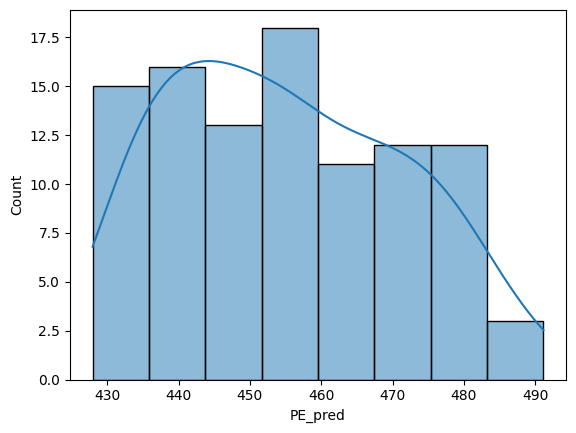

In [58]:
sns.histplot(data=xnew, x="PE_pred", kde=True)
plt.show()

In [60]:
xnew.to_csv("DTR_Results.csv", index=False)

# Step 10 - Save preprocessor and model object in joblib format

In [61]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [62]:
best_dtr

DecisionTreeRegressor(max_depth=11, min_samples_leaf=6, min_samples_split=5,
                      random_state=42)

In [63]:
import joblib

joblib.dump(num_pipe, "pre.joblib")

['pre.joblib']

In [64]:
joblib.dump(best_dtr, "dtr_model.joblib")

['dtr_model.joblib']

# Load model object

In [65]:
p = joblib.load("pre.joblib")
p

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [66]:
m = joblib.load("dtr_model.joblib")
m

DecisionTreeRegressor(max_depth=11, min_samples_leaf=6, min_samples_split=5,
                      random_state=42)

In [67]:
m.score(xtrain, ytrain)

0.9685532607866508

In [68]:
m.score(xtest, ytest)

0.9497621259104275